## Information Architecture - Project Statistics - Marlee, Jackie, Yuehao, Ke, Alan

Our project revolves around 311 NYC complaint data, mainly from 2019 t0 2021. Part of this data is the amount of complaints per zip code. The first item we will look into is the relationship between NYC zip codes' median income and the frequency of complaints directed to 311. 

In [122]:
#import pandas, read median income per NYC zipcode into df
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/MarlaGoodman/IA-Project/main/nyc_median_income.csv')

#drop 'index' column
df.drop(['index'],axis=1)

,Location,All_Households,Families,Families_with_Children,Families_without_Children
0,10001,92840,122776,106452,132545.0
1,10002,36982,40045,42054,38639.0
2,10003,118161,183787,250001,153480.0
3,10004,190223,205202,244000,204130.0
4,10005,189702,241094,250001,202042.0
...,...,...,...,...,...
176,11691,50267,61360,60325,64441.0
177,11692,46819,50516,42614,57188.0
178,11693,60569,66250,62188,67741.0
179,11694,84485,111046,120943,107721.0


In [123]:
#read data containing frequency of complaints per zipcode into df311
df311=pd.read_csv('https://raw.githubusercontent.com/MarlaGoodman/IA-Project/main/nyc_311_zip.csv')
df311

,zipcode,freq
0,10000,4
1,10001,273
2,10002,906
3,10003,415
4,10004,39
...,...,...
192,11692,134
193,11693,134
194,11694,209
195,11697,2


In [124]:
#Merge the two dataframes
#Only merging on the zip codes that match; Zipcodes not present in both dataframes won't be included in the merged df
merged=df.merge(df311, left_on='Location', right_on='zipcode')

In [125]:
#drop unwanted columns from merged df
merged.drop(['index','Families_with_Children','Families_without_Children','zipcode'],axis=1,inplace=True)

In [126]:
#rename merged df columns
merged.rename(columns={"freq":"Freq Complaint","Location": "Zipcode","All_Households":"Avg Inc Per House","Families": 
                       "Avg Inc Per Fam"},inplace=True)


In [127]:
#show some of merged df
merged.head()

,Zipcode,Avg Inc Per House,Avg Inc Per Fam,Freq Complaint
0,10001,92840,122776,273
1,10002,36982,40045,906
2,10003,118161,183787,415
3,10004,190223,205202,39
4,10005,189702,241094,24


In [128]:
#import libraries and assign features for graphs
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)

#### QUICK EXPLORATORY DATA ANALYSIS FOR MERGED DATAFRAME:

In [129]:
#Zipcode column info 
merged['Zipcode']

0      10001
1      10002
2      10003
3      10004
4      10005
       ...  
175    11691
176    11692
177    11693
178    11694
179    11697
Name: Zipcode, Length: 180, dtype: int64

There are 180 zipcodes in the merged df, each one a unique zipcode. 

For our work, we will use the Average Income Per House column rather than the Average Income Per Family column.

In [130]:
#summary statistics
merged['Avg Inc Per House'].describe()

count       180.000000
mean      78051.061111
std       38006.824406
min       21447.000000
25%       54195.250000
50%       70846.500000
75%       93446.000000
max      250001.000000
Name: Avg Inc Per House, dtype: float64

This column lets us know the average income per household per zip code (180 zip codes in our merged dataset). From the summary statistics, we see that the average income across all zipcodes is $78,051.06. 

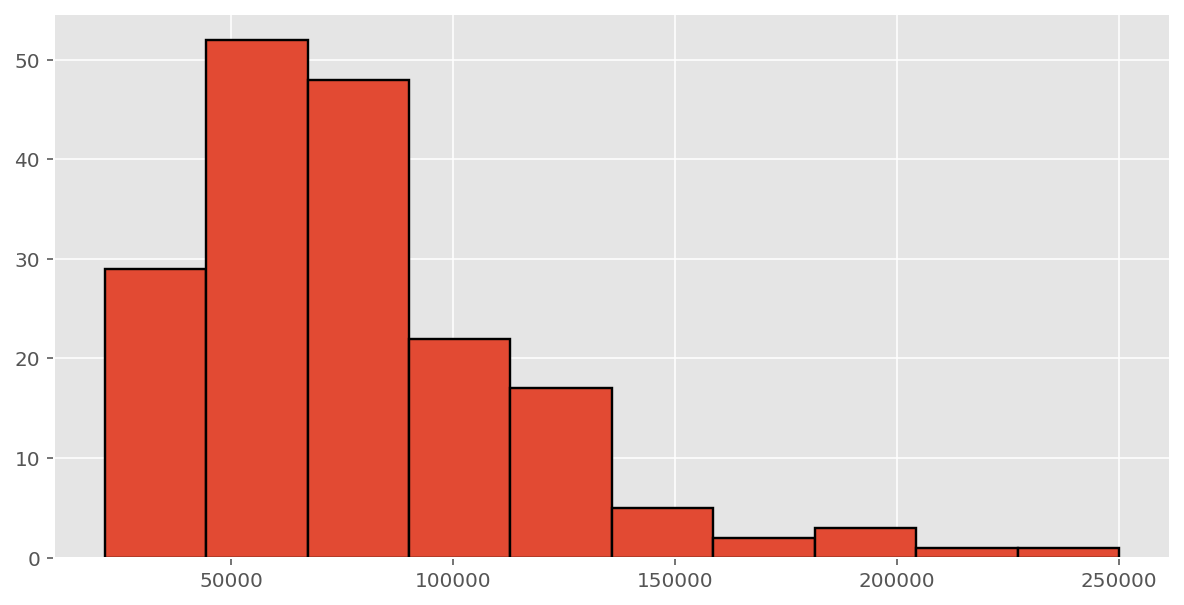

In [131]:
#graph Average Income Per Household
plt.hist(merged['Avg Inc Per House'], edgecolor = 'black', linewidth = 1.2)
plt.show();

The graph above makes sense - more people will make little money on average. Fewer people will make lots of money on average. This series of data is skewed right because of the wealthy people in NYC. 

In [132]:
#summary statistics
merged['Freq Complaint'].describe()

count     180.000000
mean      542.722222
std       438.059447
min         1.000000
25%       228.000000
50%       414.000000
75%       821.750000
max      2281.000000
Name: Freq Complaint, dtype: float64

The average number of complaints to 311 from 180 zipcodes is 542 complaints, with one zipcode having 2281 complaints and another zipcode having just 1. 

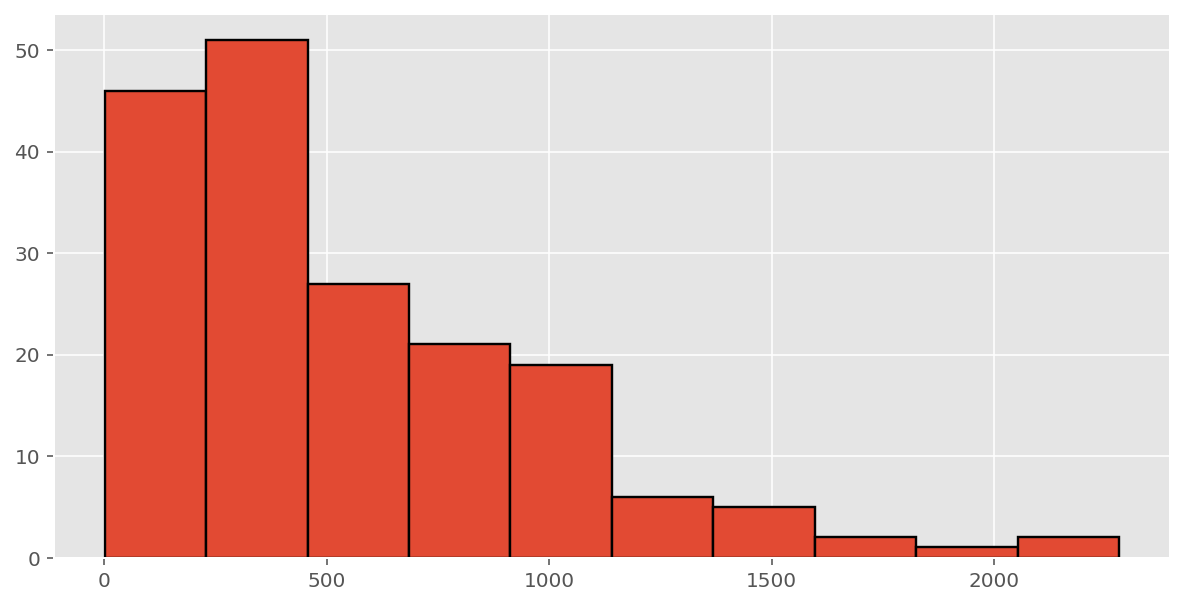

In [133]:
plt.hist(merged['Freq Complaint'], edgecolor = 'black', linewidth = 1.2)
plt.show();

This graph makes sense - odd are that many zipcodes won't log as many as a thousand complaints in a given time. However, some zipcodes do log thousands of complaints. It is undetermined as to why. 

#### INITIAL ANALYSIS:

We will create a scatterplot to see if there is any correlation between a zipcode's average income per household and the frequency of its complaints to 311.

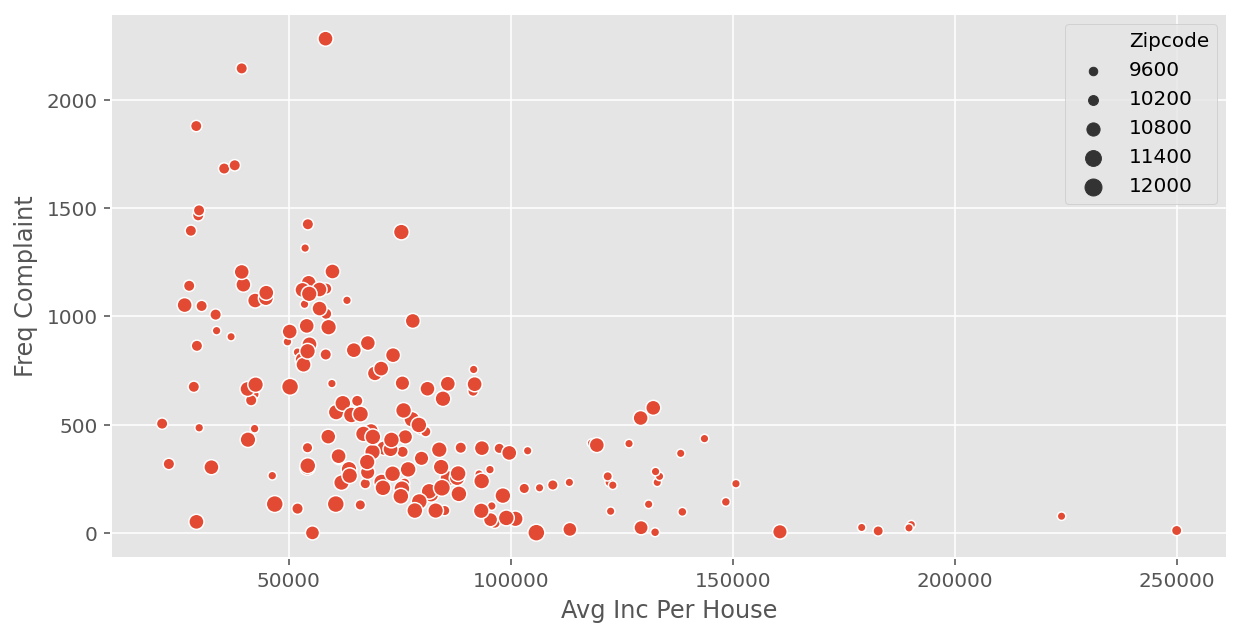

In [134]:
#graph scatterplot
sns.scatterplot(x = merged['Avg Inc Per House'], 
                y =  merged['Freq Complaint'],  
                size = merged['Zipcode'])
plt.show();

There appears to be more complaints the lower median income a zip code has. This does not mean that a low income average causes people to complain more, but this correlation is definitely something that could be looked into further.

#### SIMPLE LINEAR REGRESSION:

In [135]:
#import libraries
import numpy as np
from sklearn.linear_model import LinearRegression

In [136]:
#assign variables
x = np.array(merged['Avg Inc Per House']).reshape((-1, 1))
y = np.array(merged['Freq Complaint'])

In [137]:
#fit the model
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.31452125779972784


An R2 of 31.50% is not terrible, considering we aren't trying to make predictions of this data now. Nearly 32% (or almost a third) of all the variation in the frequency of complaints from NYC zipcodes is explained by just the one variable of medican income per zipcode.

## HYPOTHESIS TESTING ON OTHER VARIABLES FROM OUR DATA

#### CHI SQUARE TEST OF INDEPENDENCE

We want to see if the timing variables (Pre/During Covid) and the 311 NYC complaints are associated or not.

In [138]:
#read complaint type/year data into dataframe
df_cvc=pd.read_csv('https://raw.githubusercontent.com/MarlaGoodman/IA-Project/main/covid_year_ct.csv')
#group data by year and then complaint type
grouped = df_cvc.groupby(['date_year', 'complaint_type']).count()
grouped

ct_key
date_year complaint_type              
2019      Illegal Parking       246097
          UNSANITARY CONDITION   61124
          Water System           64446
2020      Illegal Parking       238063
          UNSANITARY CONDITION   70427
          Water System           63748
2021      UNSANITARY CONDITION    9974
          Water System            7116

#### Null Ho: There is no association between it being/not being Covid and the 311 NYC complaint type (ie they are independent).

#### Alternative Ha: There is an association between these two categorical variables (ie they are not independent).

Conditions for Chi Square Test Of Independence:

1. We have a simple random sample -- this condition will be met below.

2. In the contingency table, each cell has an expected count of at least 5 -- this condition will also be met below.

In [139]:
#getting random sample
data_sample=df_cvc.sample(n=70000,replace=True, random_state=1)

#show some of random sample
data_sample.head()

#condition 1 is met

,complaint_type,date_year,ct_key
128037,Illegal Parking,2019,3
491755,UNSANITARY CONDITION,2019,9
470924,Illegal Parking,2020,3
491263,UNSANITARY CONDITION,2019,9
371403,Illegal Parking,2020,3


In [140]:
#creating contingency table
table=pd.crosstab(data_sample['date_year'], data_sample['complaint_type'], margins=True)
table

complaint_type,Illegal Parking,UNSANITARY CONDITION,Water System,All
date_year,,,,
2019,22471,5646,5925,34042
2020,21889,6516,5955,34360
2021,0,903,695,1598
All,44360,13065,12575,70000


In [141]:
#get expected counts for the contigency table cells 
#(E = [# of total row i observations * # of total column j observations]/total # of observations)

row_sum = table.iloc[0:3,3].values
exp = []
for j in range(3):
    for val in table.iloc[3,0:3].values:
        exp.append(val * row_sum[j] / table.loc['All', 'All'])
print(exp)

[21572.901714285716, 6353.696142857143, 6115.402142857143, 21774.422857142858, 6413.048571428571, 6172.528571428571, 1012.6754285714286, 298.2552857142857, 287.06928571428574]


As seen from above, the cells have expected counts of greater than 5. Condition 2 is met. 

To get X2, we do: (every observation - its expected count)^2 / its expected count) and sum all those values up.
To get degrees of freedom, we do: (number of categories in the first variable-1)*(number of categories in the second variable-1). All this can be done using a python package.

In [142]:
#import libraries
from scipy import stats
from scipy.stats import chi2_contingency

In [143]:
table_code=table[0:3].drop(['All'],axis=1)

In [144]:
#get info
chi2_contingency(table_code)

(2950.601455682482,
 0.0,
 4,
 array([[21572.90171429,  6353.69614286,  6115.40214286],
        [21774.42285714,  6413.04857143,  6172.52857143],
        [ 1012.67542857,   298.25528571,   287.06928571]]))

This has given us the 𝜒2 value, p-value, degree of freedom and the expected values:

Chi is 2950.60

P Value is 0.0

Degree of Freedom is 4

The expected counts are as we calculated above

Using a significance level of .05 (95%), we see that the p-value (0) is less than the significance value. Therefore, we reject the null hypothesis and conclude that there is some association between the timing of covid (Pre or During) and the complaints received by 311 in NYC. 

Not only that but if X2 is greater than the critical value, we reject the null hypothesis. 

In [145]:
#import package
from scipy.stats import chi2

#state significance level, p, & degrees of freedom to calculate critical value
significance = 0.05
p = 1 - significance
dof = chi2_contingency(table_code)[2]
critical_value = chi2.ppf(p, dof)

critical_value

9.487729036781154

2950.60 is greater than 9.49 by far, so again this proves we reject the null hypothesis. 